# Iris Flower Classification

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
iris = load_iris()

In [18]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map(dict(zip(range(3), iris.target_names)))

In [20]:
df.drop('species', axis=1, inplace=True)

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


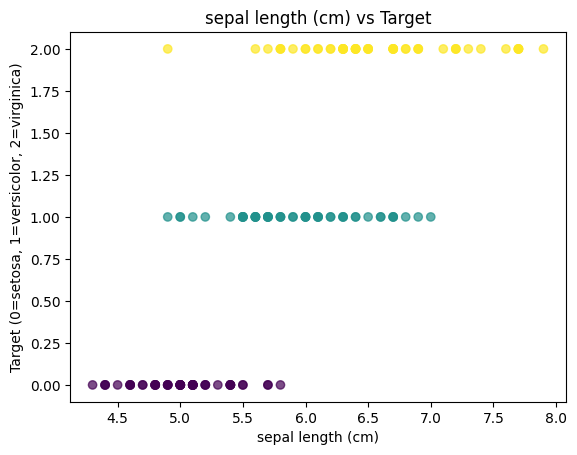

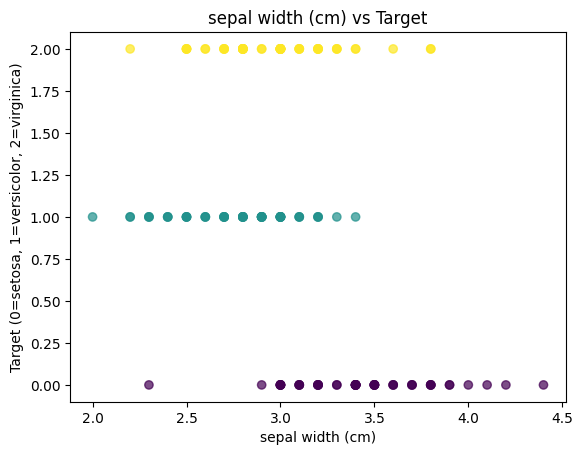

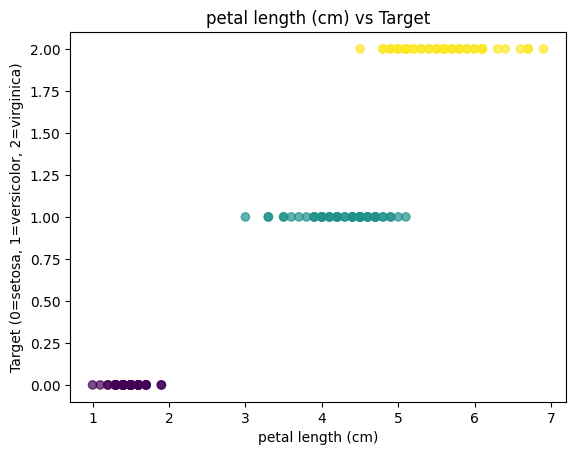

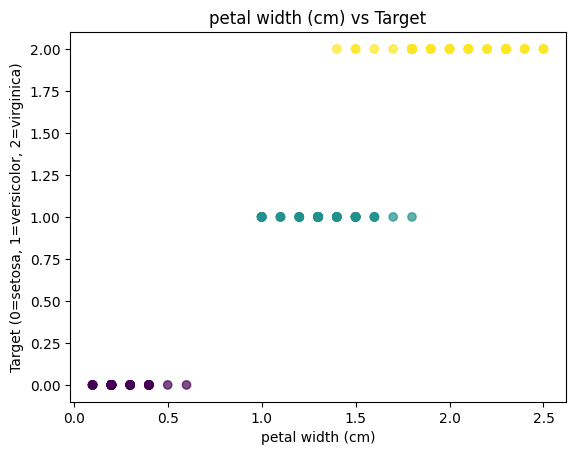

In [29]:


for col in df.columns[:-1]:
  plt.scatter(df[col], df['target'], alpha=0.7, c=df['target'])
  plt.ylabel('Target (0=setosa, 1=versicolor, 2=virginica)')
  plt.xlabel(col)
  plt.title(f'{col} vs Target')
  plt.show()

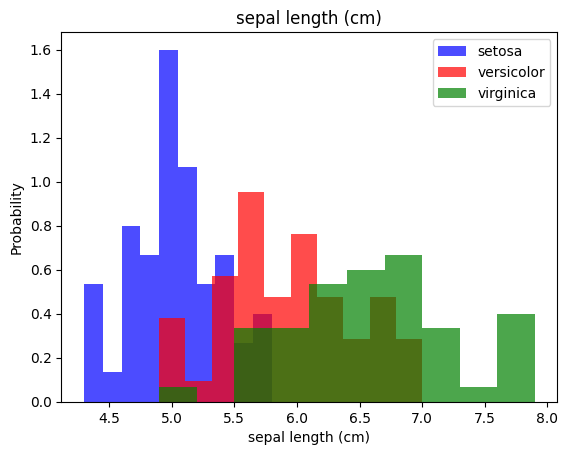

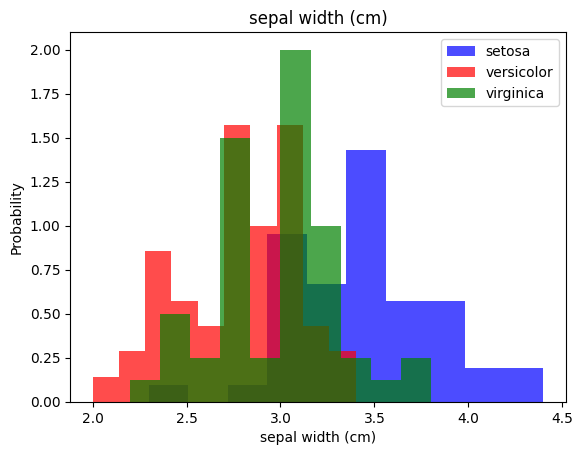

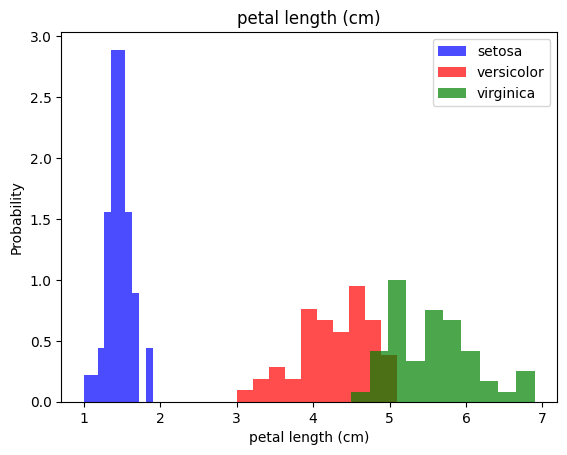

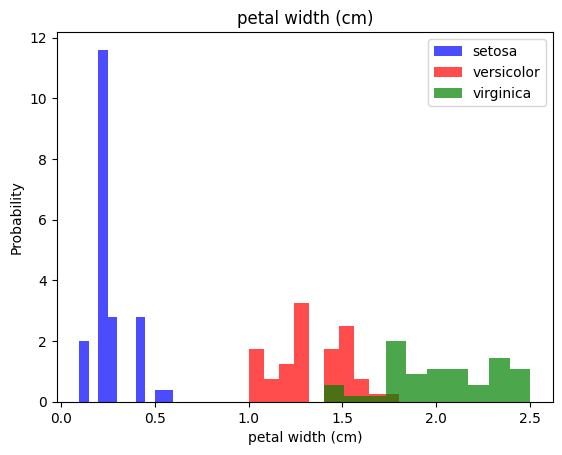

In [32]:
for label in df.columns[:-1]:
  plt.hist(df[df["target"] == 0][label], color='blue', label='setosa', alpha=0.7, density=True)
  plt.hist(df[df["target"] == 1][label], color='red', label='versicolor', alpha=0.7, density=True)
  plt.hist(df[df["target"] == 2][label], color='green', label='virginica', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [33]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [36]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scalar = StandardScaler()
  X = scalar.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

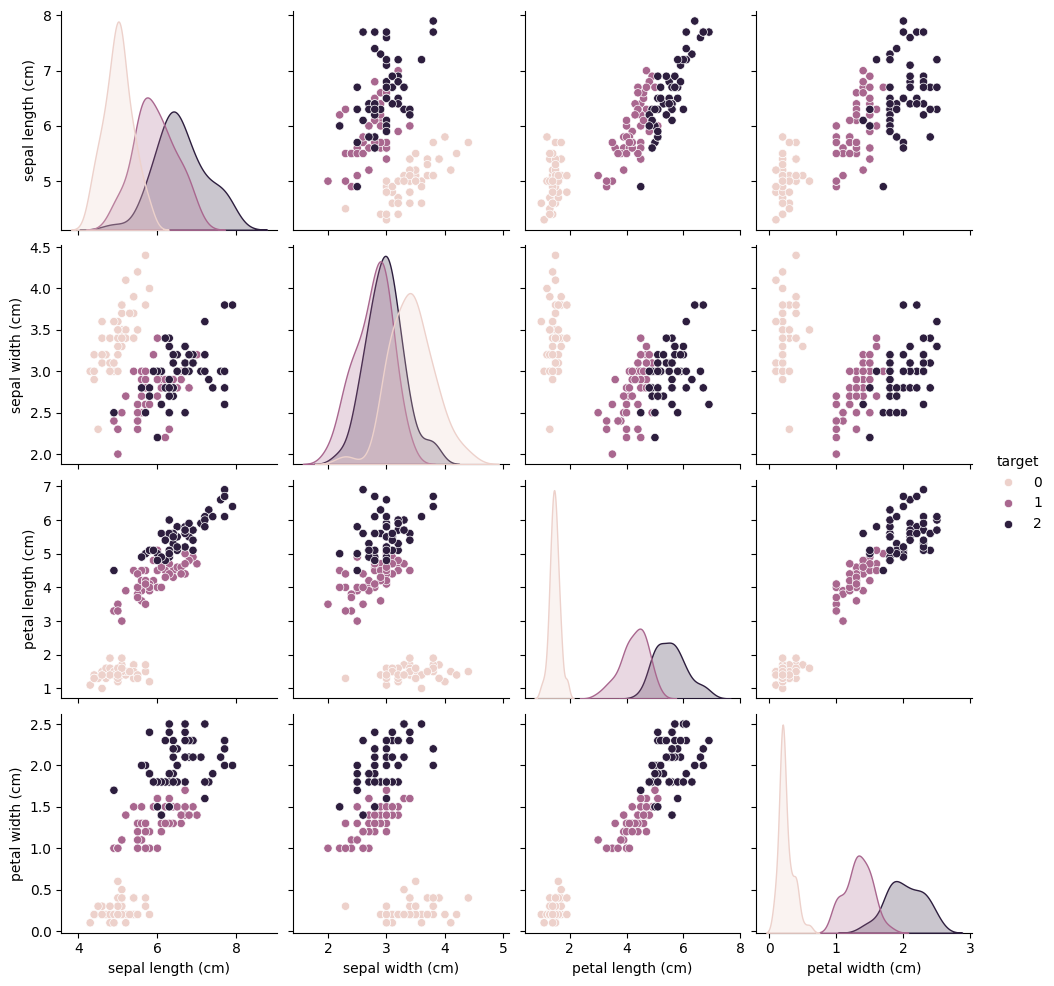

In [59]:
sns.pairplot(df, hue='target')

In [38]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
y_pred = knn_model.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        13
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [57]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.69      0.82        13
           2       0.69      1.00      0.82         9

    accuracy                           0.87        30
   macro avg       0.90      0.90      0.88        30
weighted avg       0.91      0.87      0.87        30



# Log Regresssion

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [62]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        13
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# SVM

In [63]:
from sklearn.svm import SVC

In [64]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [65]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        13
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Neural net

In [75]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [76]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')

  plt.show()

In [77]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(3, activation='softmax')  # 3 units for 3 classes, softmax activation
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                     loss='categorical_crossentropy', metrics=['accuracy'])  # Use categorical crossentropy

    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )

    return nn_model, history


16 nodes, dropout 0, lr 0.005, batch size 32


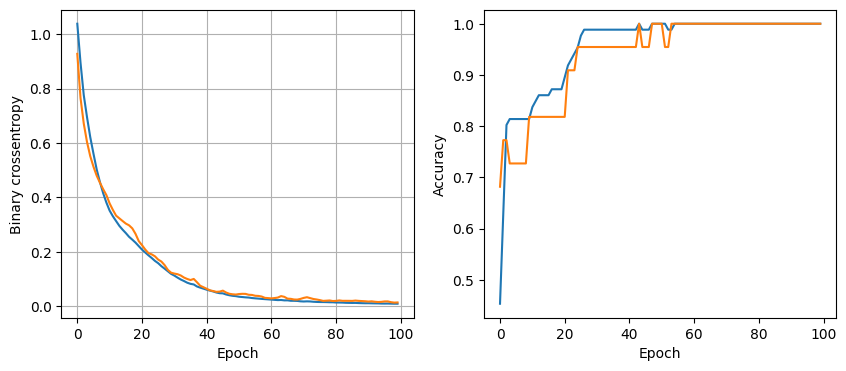

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7667 - loss: 1.5834
16 nodes, dropout 0, lr 0.005, batch size 64


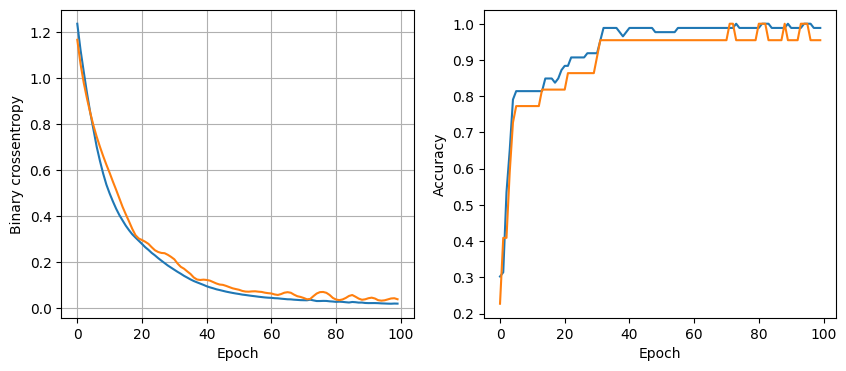

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7667 - loss: 1.6501
16 nodes, dropout 0, lr 0.001, batch size 32


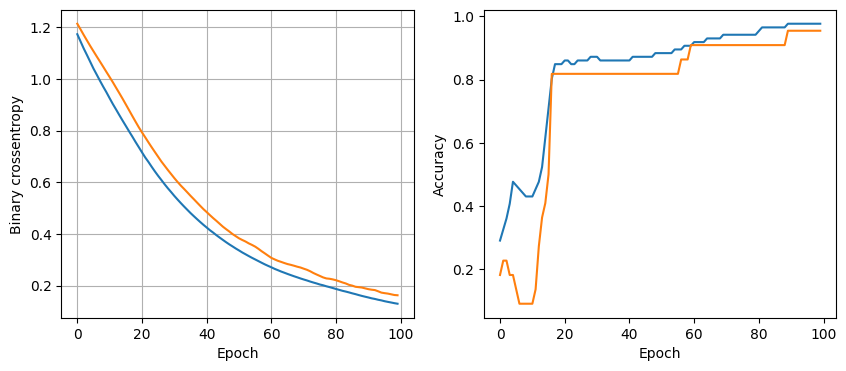

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6667 - loss: 0.7338
16 nodes, dropout 0, lr 0.001, batch size 64


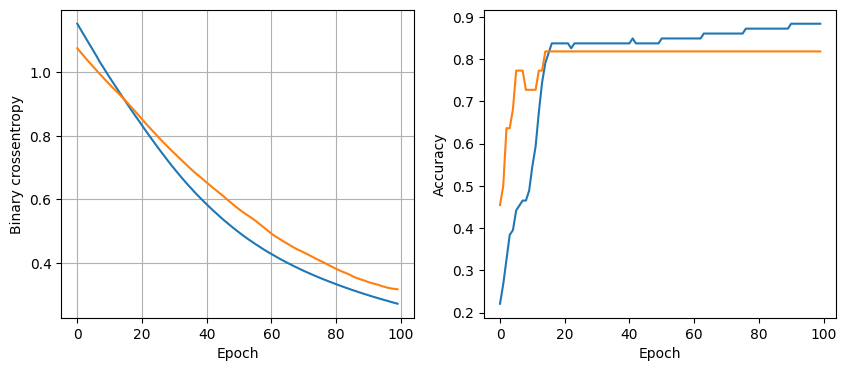

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7000 - loss: 0.5599
16 nodes, dropout 0.2, lr 0.005, batch size 32


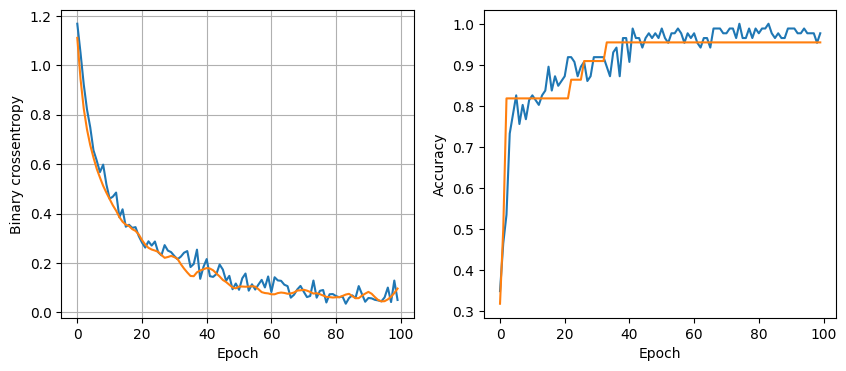

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7000 - loss: 1.8286
16 nodes, dropout 0.2, lr 0.005, batch size 64


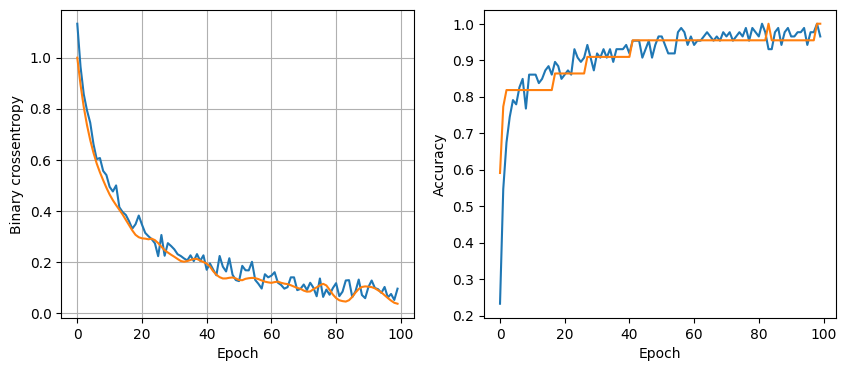

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8333 - loss: 0.8752
16 nodes, dropout 0.2, lr 0.001, batch size 32


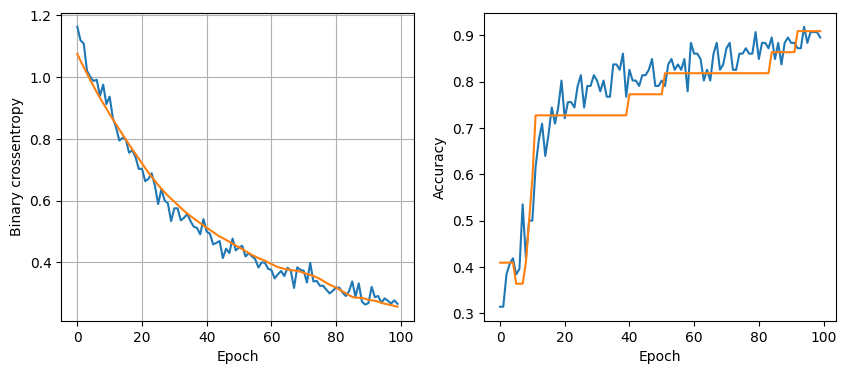

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7000 - loss: 0.5426
16 nodes, dropout 0.2, lr 0.001, batch size 64


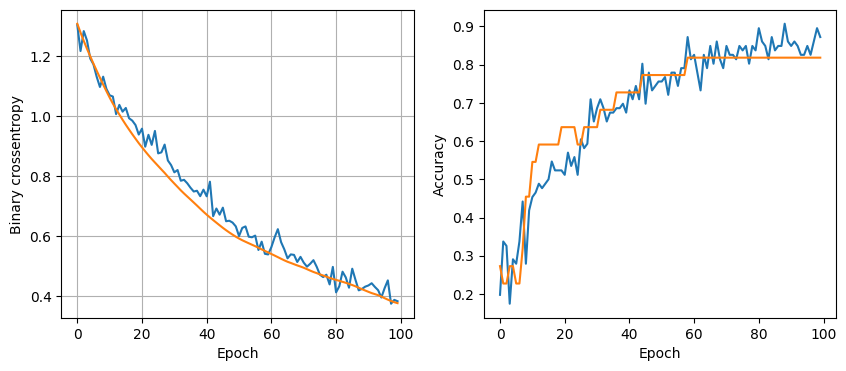

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7000 - loss: 0.5216
32 nodes, dropout 0, lr 0.005, batch size 32


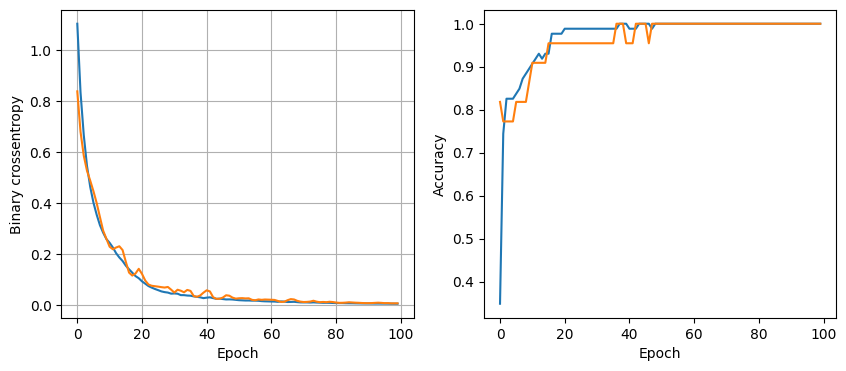

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7667 - loss: 1.8687
32 nodes, dropout 0, lr 0.005, batch size 64


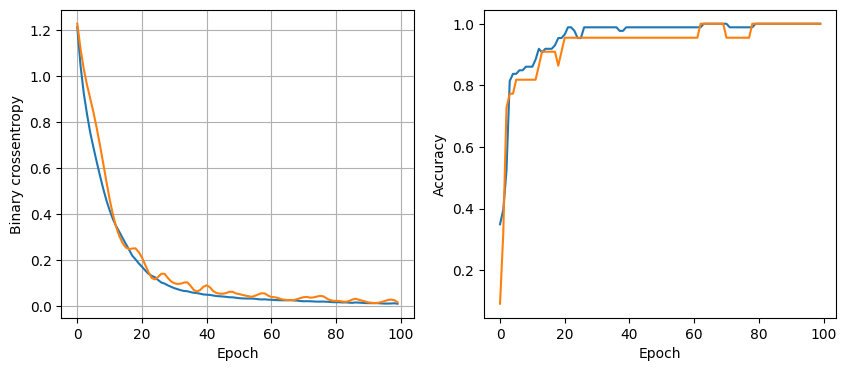

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7667 - loss: 1.5853
32 nodes, dropout 0, lr 0.001, batch size 32


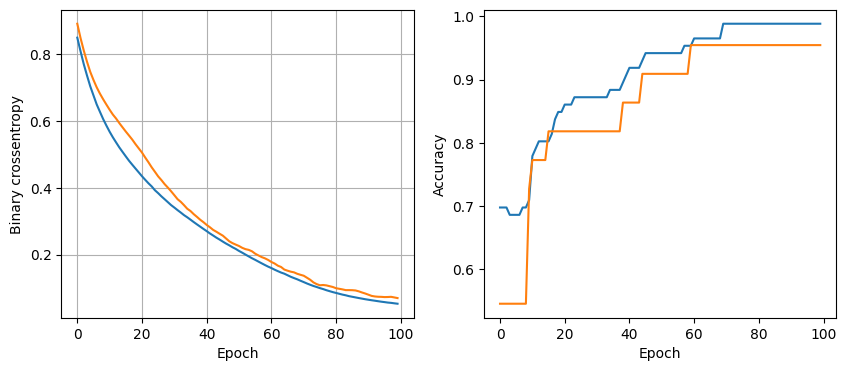

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7667 - loss: 0.9057
32 nodes, dropout 0, lr 0.001, batch size 64


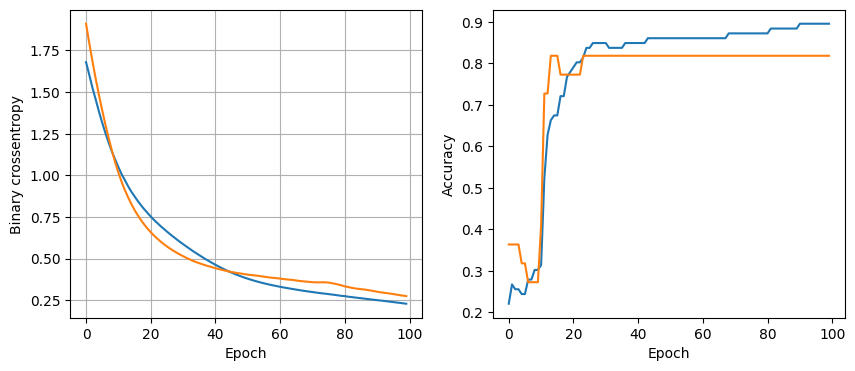

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6667 - loss: 0.5869
32 nodes, dropout 0.2, lr 0.005, batch size 32


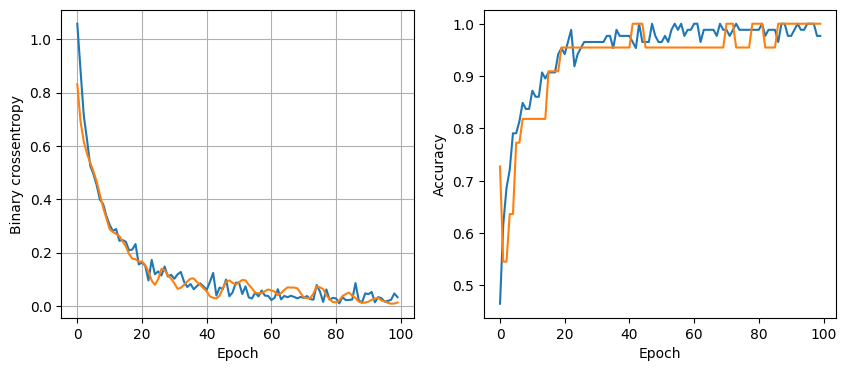

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8000 - loss: 1.3999
32 nodes, dropout 0.2, lr 0.005, batch size 64


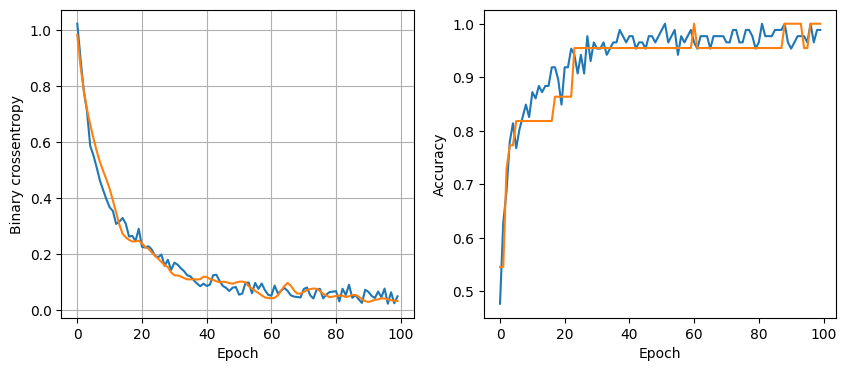

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8000 - loss: 1.3164
32 nodes, dropout 0.2, lr 0.001, batch size 32


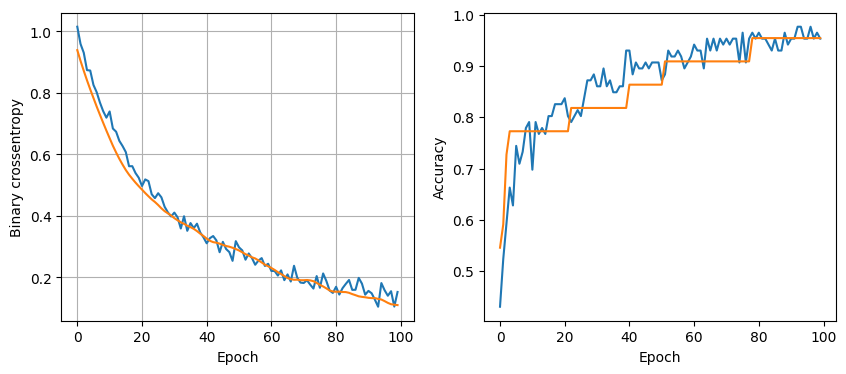

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7667 - loss: 0.6998
32 nodes, dropout 0.2, lr 0.001, batch size 64


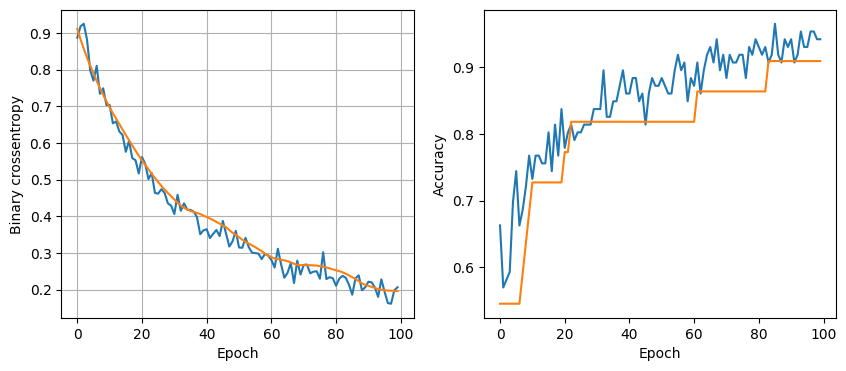

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7000 - loss: 0.6163


In [78]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
y_train = to_categorical(y_train, num_classes=3)
y_valid = to_categorical(y_valid, num_classes=3)
for num_nodes in [16, 32]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.005, 0.001]:
      for batch_size in [32, 64]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [80]:
from sklearn.metrics import confusion_matrix
y_pred_prob = least_loss_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = y_test
print(classification_report(y_test_labels, y_pred))
print(confusion_matrix(y_test_labels, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.54      0.70        13
           2       0.60      1.00      0.75         9

    accuracy                           0.80        30
   macro avg       0.87      0.85      0.82        30
weighted avg       0.88      0.80      0.80        30

[[8 0 0]
 [0 7 6]
 [0 0 9]]


# Saving the model for later uses

In [82]:
import joblib

In [83]:
joblib.dump(knn_model, 'iris_knn_model.pkl')

['iris_knn_model.pkl']